In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_original = tX
y_original = y

In [3]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Exploratory Part

In [4]:
tX = tX_original # This is needed because python notebooks are a really "pleasant" way to code
y = y_original

# Obtain name of the columns for visualization
with open(DATA_TRAIN_PATH) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    column_names = []
    for row in csv_reader:
        column_names.append(row)
        column_names = column_names[0] # This is because otherwise it's a list inside of a list
        break
    column_names = column_names[2:] # remove 'id' and 'prediction', useless

In [5]:
print(y)
print(tX)
print(ids)
print(column_names)
print("\n")
print(f"Number of training samples: %d" % len(y))
print(f"Number of features: %d " % len(column_names))

[ 1. -1. -1. ...  1. -1. -1.]
[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]]
[100000 100001 100002 ... 349997 349998 349999]
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_sublead

In [6]:
# Which features have the most nans ?
# remove the missing values (-999) to better observe the data
tX[tX == -999] = np.nan
is_nan = np.isnan(tX)
nb_rows = len(tX)

for (i, name) in enumerate(column_names):
    count = np.count_nonzero(is_nan[:, i])
    print("{}: {:.3f}".format(name, count / nb_rows))

DER_mass_MMC: 0.152
DER_mass_transverse_met_lep: 0.000
DER_mass_vis: 0.000
DER_pt_h: 0.000
DER_deltaeta_jet_jet: 0.710
DER_mass_jet_jet: 0.710
DER_prodeta_jet_jet: 0.710
DER_deltar_tau_lep: 0.000
DER_pt_tot: 0.000
DER_sum_pt: 0.000
DER_pt_ratio_lep_tau: 0.000
DER_met_phi_centrality: 0.000
DER_lep_eta_centrality: 0.710
PRI_tau_pt: 0.000
PRI_tau_eta: 0.000
PRI_tau_phi: 0.000
PRI_lep_pt: 0.000
PRI_lep_eta: 0.000
PRI_lep_phi: 0.000
PRI_met: 0.000
PRI_met_phi: 0.000
PRI_met_sumet: 0.000
PRI_jet_num: 0.000
PRI_jet_leading_pt: 0.400
PRI_jet_leading_eta: 0.400
PRI_jet_leading_phi: 0.400
PRI_jet_subleading_pt: 0.710
PRI_jet_subleading_eta: 0.710
PRI_jet_subleading_phi: 0.710
PRI_jet_all_pt: 0.000


In [7]:
# Correct column 1 (DER_mass_MMC) because few nans (15%)
# CAN USE np.nanmedian for median
col_mean = np.nanmean(tX, axis=0)
# print(col_mean)
mean_one = col_mean[0]
#Find indices that you need to replace
inds = np.where(np.isnan(tX[:, 0]))[0]
# Place column means in the indices. Align the arrays using take
tX[inds, 0] = mean_one

In [8]:
# ADD y COLUMN TO tX (for later)
tX_augmented = np.c_[tX, y]
print(tX_augmented.shape)

(250000, 31)


### The undefined values depends on the feature PRI_jet_num, so we separate the dataset.

In [9]:
# Separate data array into 3 arrays with respect to column 22 (PRI_jet_num)
tX_zero = tX_augmented[tX_augmented[:, 22] == 0]
tX_one = tX_augmented[tX_augmented[:, 22] == 1]
tX_rest = tX_augmented[(tX_augmented[:, 22] == 2) | (tX_augmented[:, 22] == 3)]

print(len(tX_zero))
print(len(tX_one))
print(len(tX_rest))

99913
77544
72543


In [10]:
# Sanity check
print(np.count_nonzero(tX_augmented[:, 22] == 0))
print(np.count_nonzero(tX_augmented[:, 22] == 1))
print(np.count_nonzero((tX_augmented[:, 22] == 2) | (tX[:, 22] == 3)))

99913
77544
72543


In [11]:
# SEPARATE LABELS y
y_zero = tX_zero[:, -1]
y_one = tX_one[:, -1]
y_rest = tX_rest[:, -1]

tX_zero = tX_zero[:, :-1]
tX_one = tX_one[:, :-1]
tX_rest = tX_rest[:, :-1]

In [12]:
def remove_nan_col(X, colnames):
    is_nan = np.isnan(X)
    X_del = np.delete(X, is_nan.any(axis=0), 1)
    names = np.delete(colnames, is_nan.any(axis=0))
    return X_del, names

In [13]:
# Removed columns with nans in each data array
tX_zero, colnames_zero = remove_nan_col(tX_zero, column_names)
tX_one, colnames_one = remove_nan_col(tX_one, column_names)
tX_rest, colnames_rest = remove_nan_col(tX_rest, column_names)

print(len(tX_zero[0]))
print(len(tX_one[0]))
print(len(tX_rest[0]))

20
23
30


In [14]:
# Remove columns with nans from tX (not separated)
print(tX.shape)
is_nan = np.isnan(tX)
tX_del = np.delete(tX, is_nan.any(axis=0), 1)
column_names = np.delete(column_names, is_nan.any(axis=0))
#print(column_names)
print(tX_del.shape)
tX = tX_del

(250000, 30)
(250000, 20)


In [15]:
summary = np.quantile(tX, [0.0, 0.25, 0.5, 0.75, 1.0], axis=0)
for (i, name) in enumerate(column_names):
    if i == 0 or i == 1:
        continue
    else:
        print("{}: {}".format(name, summary[:,i-2]))

DER_mass_vis: [   9.044     95.665    119.958    130.60625 1192.026  ]
DER_pt_h: [  0.     19.241  46.524  73.598 690.075]
DER_deltar_tau_lep: [   6.329     59.38875   73.752     92.259   1349.351  ]
DER_pt_tot: [   0.        14.06875   38.4675    79.169   2834.999  ]
DER_sum_pt: [0.208  1.81   2.4915 2.961  5.684 ]
DER_pt_ratio_lep_tau: [   0.        2.841    12.3155   27.591  2834.999 ]
DER_met_phi_centrality: [  46.104     77.55     120.6645   200.47825 1852.462  ]
PRI_tau_pt: [ 0.047  0.883  1.28   1.777 19.773]
PRI_tau_eta: [-1.414 -1.371 -0.356  1.225  1.414]
PRI_tau_phi: [ 20.       24.59175  31.804    45.017   764.408  ]
PRI_lep_pt: [-2.499 -0.925 -0.023  0.898  2.497]
PRI_lep_eta: [-3.142 -1.575 -0.033  1.565  3.142]
PRI_lep_phi: [ 26.     32.375  40.516  53.39  560.271]
PRI_met: [-2.505 -1.014 -0.045  0.959  2.503]
PRI_met_phi: [-3.142 -1.522  0.086  1.618  3.142]
PRI_met_sumet: [1.090000e-01 2.139800e+01 3.480200e+01 5.189500e+01 2.842617e+03]
PRI_jet_num: [-3.142 -1.575 -0.

In [16]:
def display(tX, names):
    # Plot the distributions of the features
    fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(22, 12))
    fig.tight_layout()
    N = tX.shape[1]

    for i in range(0, N):
        ax = fig.axes[i]
        col = tX[:, i]
        ax.hist(col, bins=100)
        ax.title.set_text(names[i])

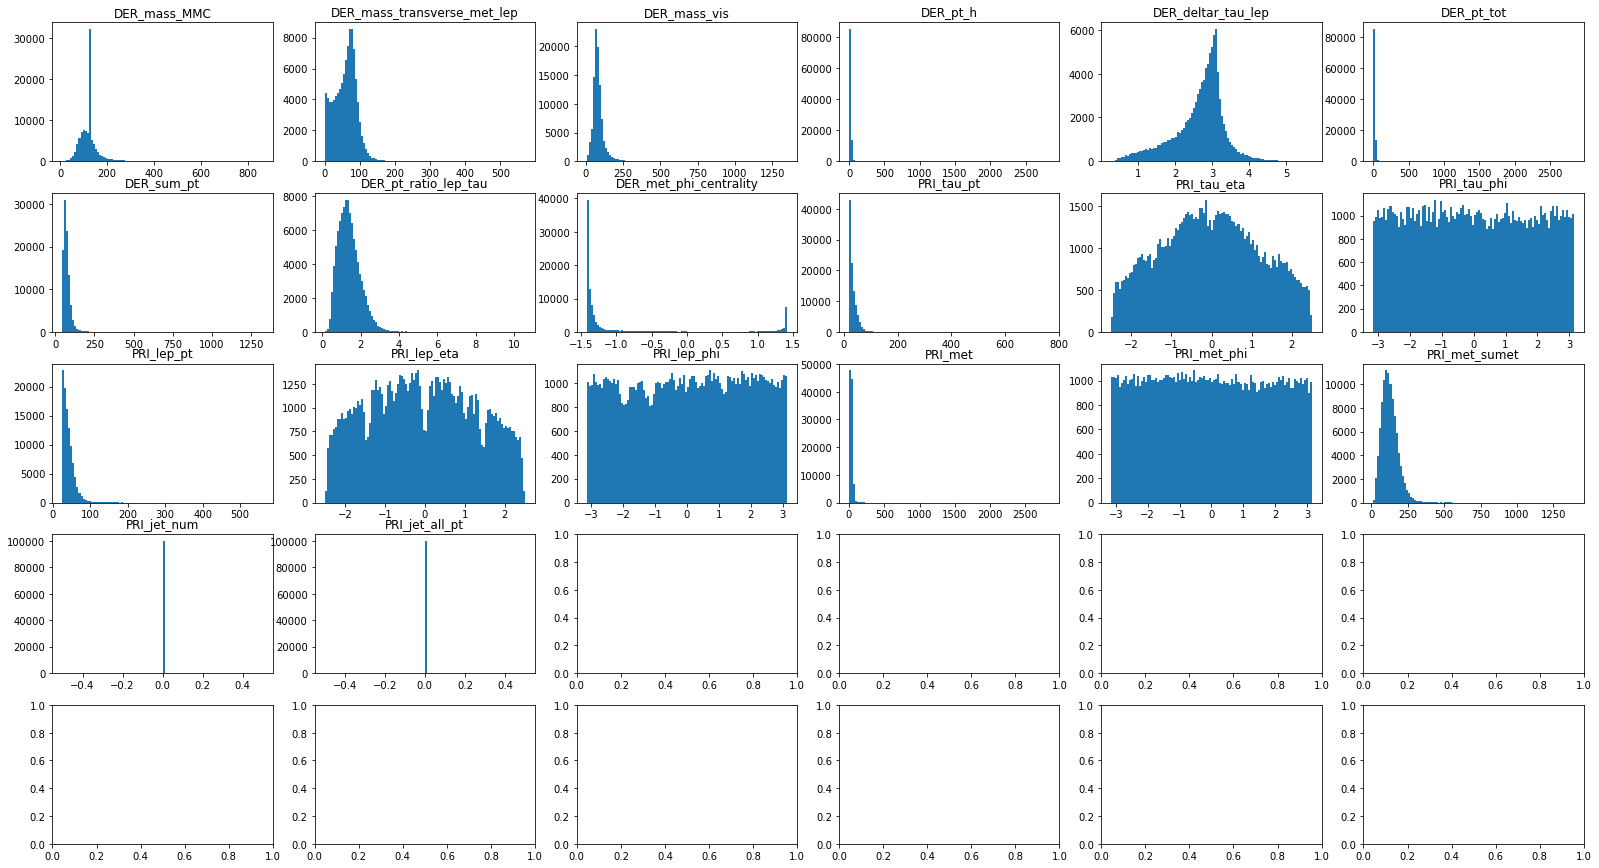

In [17]:
display(tX_zero, colnames_zero)

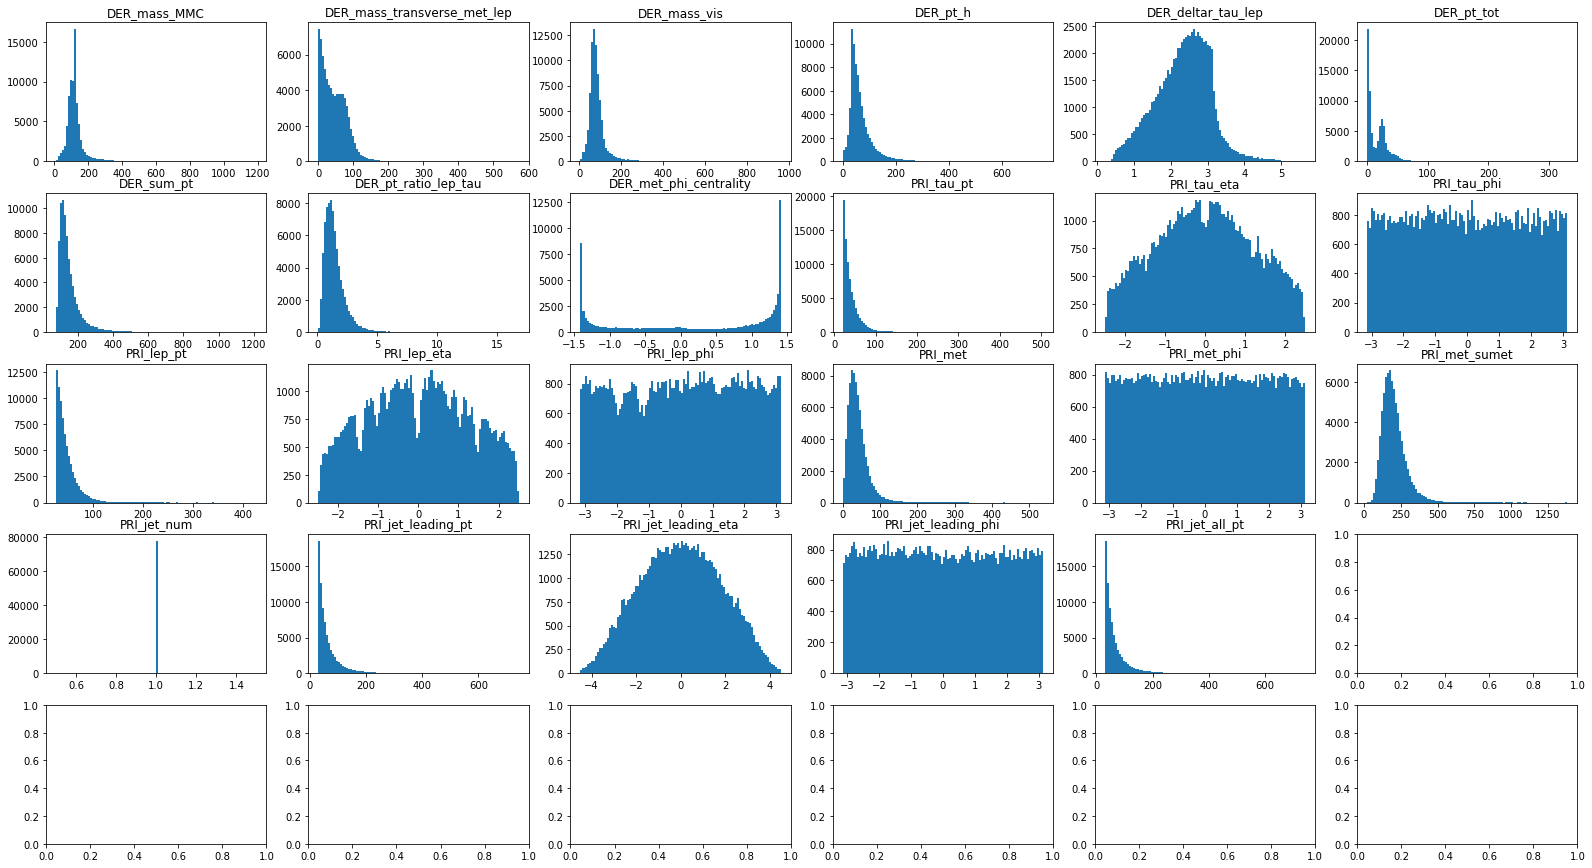

In [18]:
display(tX_one, colnames_one)

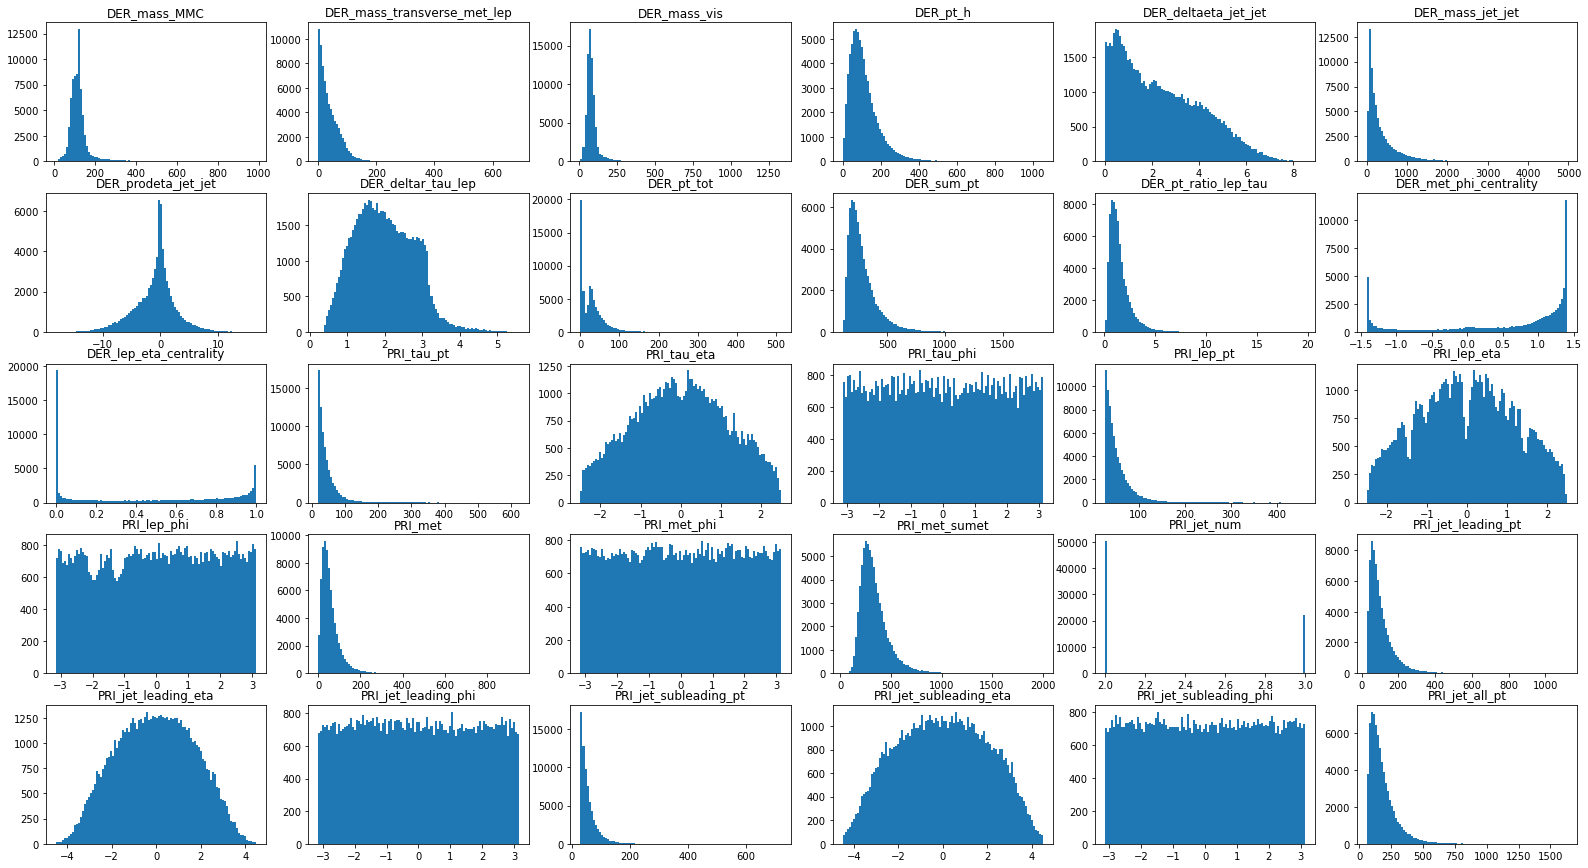

In [19]:
display(tX_rest, colnames_rest)

In [20]:
# Take logs of columns with heavy tails distribution
for col in [
    "DER_mass_MMC",
    "DER_mass_transverse_met_lep",
    "DER_mass_vis",
    "DER_pt_h",
    "DER_pt_tot",
    "DER_sum_pt",
    "DER_pt_ratio_lep_tau",
    "PRI_tau_pt",
    "PRI_lep_pt",
    "PRI_met",
    "PRI_met_sumet",
]:
    i = np.where(column_names == col)
    tX[:, i] = np.log(1 + tX[:, i])

In [21]:
# This should be temporary
# y[y == -1] = 0

In [22]:
def standardize(x):
    """Standardize a data set."""
    n = x.shape[0]
    mean_x = np.mean(x, axis = 0)
    x = mean_x - x
    std_x = np.std(x, axis = 0) + 1e-9 # add small number to avoid dividing by 0
    x = x / std_x
    return x

In [23]:
# Standardize data 
tX = standardize(tX)
print(tX)

[[-0.54504954 -0.40473133 -0.66083916 ... -0.64548615 -1.04440205
  -0.4125105 ]
 [-0.96906073 -0.68386521 -0.78926644 ...  0.14464794 -0.02130497
   0.27381996]
 [-0.18503225 -1.52660987 -1.26455258 ... -0.65680329 -0.02130497
   0.29396985]
 ...
 [ 0.22175969 -0.55916831 -0.05420312 ... -0.18621375 -0.02130497
   0.31701723]
 [ 0.51673079  0.53766064  0.1769843  ...  0.80342604  1.00179211
   0.74543941]
 [-0.18503225 -0.73900167  0.10825892 ...  1.0218502   1.00179211
   0.74543941]]


In [24]:
tX_zero = standardize(tX_zero)
tX_one = standardize(tX_one)
tX_rest = standardize(tX_rest)

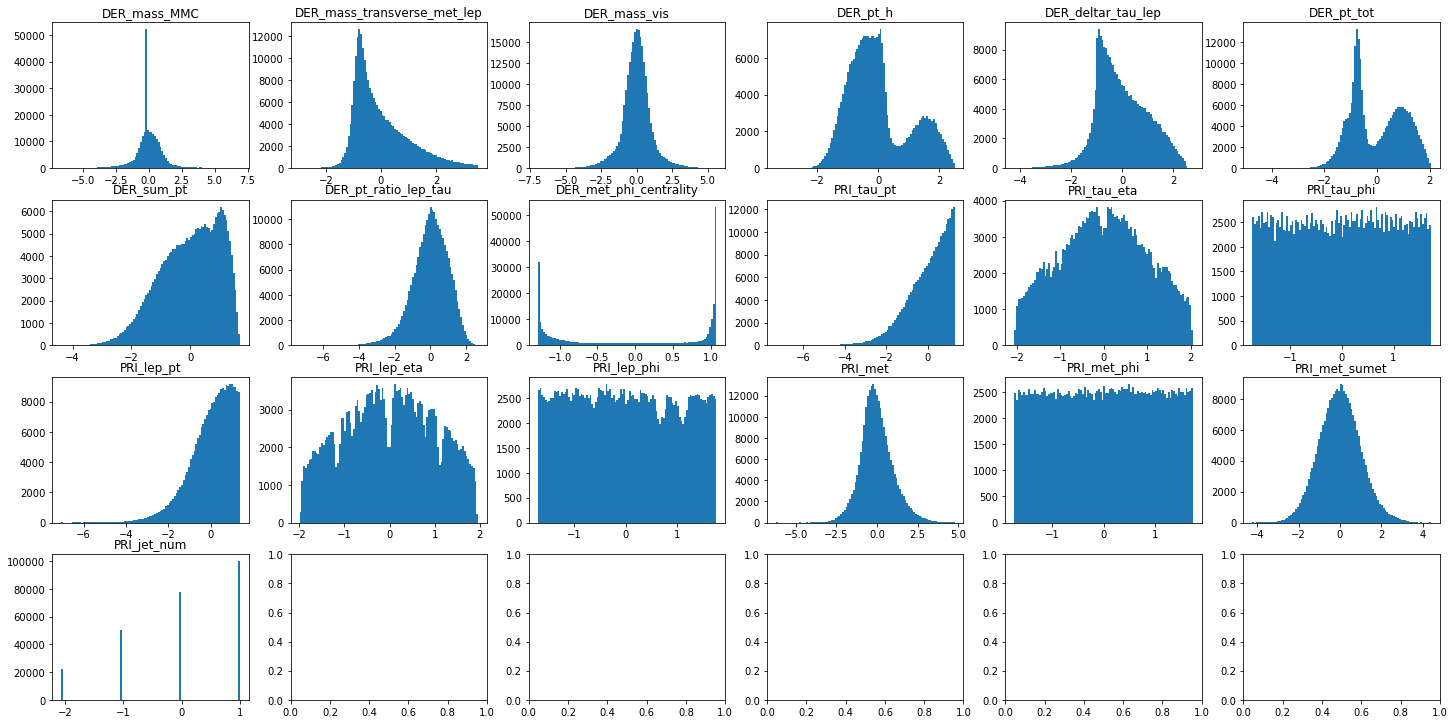

In [25]:
# Plot the distributions of the features after normalization
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))
fig.tight_layout()

for i in range(0,19):
    ax = fig.axes[i]
    col = tX[:, i]
    ax.hist(col, bins=100)
    ax.title.set_text(column_names[i + 0])

## Doing some test on different models and processed data

In [26]:
# Compute accuracy to evaluate models
def accuracy(w, y_test, tX_test):
    y_pred = predict_labels(w, tX_test)
    return 100.0 * np.sum(np.abs(y_test + y_pred)) / (2*y_test.shape[0])

In [27]:
from implementations import *

initial_w =  np.zeros(20)
w_sgd, loss_sgd = least_squares_SGD(y, tX, initial_w=initial_w, max_iters=10, gamma=0.00001)
print(accuracy(w_sgd, y, tX))
#print(w_sgd)

Loss at 0 iteration: 0.499826
Loss at 1 iteration: 0.499919
Loss at 2 iteration: 0.499805
Loss at 3 iteration: 0.499717
Loss at 4 iteration: 0.499672
Loss at 5 iteration: 0.499492
Loss at 6 iteration: 0.499844
Loss at 7 iteration: 0.499435
Loss at 8 iteration: 0.499419
Loss at 9 iteration: 0.499379
41.7376


In [28]:
initial_w =  np.zeros(20)
w_gd, loss_gd = least_squares_GD(y, tX, initial_w=initial_w, max_iters=10, gamma=0.000009)
print(accuracy(w_gd, y, tX))
#print(w_gd)

Loss at 0 iteration: 0.500000
Loss at 1 iteration: 0.499996
Loss at 2 iteration: 0.499992
Loss at 3 iteration: 0.499988
Loss at 4 iteration: 0.499984
Loss at 5 iteration: 0.499980
Loss at 6 iteration: 0.499976
Loss at 7 iteration: 0.499972
Loss at 8 iteration: 0.499968
Loss at 9 iteration: 0.499964
66.728


In [29]:
w_reg, loss_reg = ridge_regression(y, tX, lambda_=0.001)
print(accuracy(w_reg, y, tX))
#print(w_reg)

70.292


In [30]:
initial_w =  np.zeros(20)
w_logit, loss_logit = logistic_regression(y, tX, initial_w=initial_w, max_iters=10, gamma=0.07/y.shape[0], mode = "GD")
print(accuracy(w_logit, y, tX))
#print(w_logit)

Loss at 0 iteration: 171377.944047
Loss at 1 iteration: 169688.510598
Loss at 2 iteration: 168186.655943
Loss at 3 iteration: 166845.552999
Loss at 4 iteration: 165642.655495
Loss at 5 iteration: 164559.031174
Loss at 6 iteration: 163578.774507
Loss at 7 iteration: 162688.501711
Loss at 8 iteration: 161876.923655
Loss at 9 iteration: 161134.488742
67.74


In [31]:
initial_w =  np.zeros(20)
w_relog, loss_relog = reg_logistic_regression(y, tX, lambda_=0.1, initial_w=initial_w, max_iters=10, gamma=0.07/y.shape[0])
print(accuracy(w_relog, y, tX))
#print(w_relog)

Loss at 0 iteration: 171377.944102
Loss at 1 iteration: 169688.510805
Loss at 2 iteration: 168186.656383
Loss at 3 iteration: 166845.553737
Loss at 4 iteration: 165642.656587
Loss at 5 iteration: 164559.032663
Loss at 6 iteration: 163578.776431
Loss at 7 iteration: 162688.504101
Loss at 8 iteration: 161876.926535
Loss at 9 iteration: 161134.492132
67.74


In [32]:
# Test run with separated data
initial_w =  np.zeros(20)
w_relog, loss_relog = reg_logistic_regression(y_zero, tX_zero, lambda_=0.1, initial_w=initial_w, max_iters=10, gamma=0.07/y.shape[0])
print(accuracy(w_relog, y_zero, tX_zero))

initial_w =  np.zeros(23)
w_relog, loss_relog = reg_logistic_regression(y_one, tX_one, lambda_=0.1, initial_w=initial_w, max_iters=10, gamma=0.07/y.shape[0])
print(accuracy(w_relog, y_one, tX_one))

initial_w =  np.zeros(30)
w_relog, loss_relog = reg_logistic_regression(y_rest, tX_rest, lambda_=0.1, initial_w=initial_w, max_iters=10, gamma=0.07/y.shape[0])
print(accuracy(w_relog, y_rest, tX_rest))

Loss at 0 iteration: 68970.577037
Loss at 1 iteration: 68696.475166
Loss at 2 iteration: 68431.750924
Loss at 3 iteration: 68176.052672
Loss at 4 iteration: 67929.038291
Loss at 5 iteration: 67690.377387
Loss at 6 iteration: 67459.752220
Loss at 7 iteration: 67236.857775
Loss at 8 iteration: 67021.401379
Loss at 9 iteration: 66813.102167
70.18105752004244
Loss at 0 iteration: 53607.865155
Loss at 1 iteration: 53471.286809
Loss at 2 iteration: 53339.441957
Loss at 3 iteration: 53212.112080
Loss at 4 iteration: 53089.088274
Loss at 5 iteration: 52970.171290
Loss at 6 iteration: 52855.171471
Loss at 7 iteration: 52743.908595
Loss at 8 iteration: 52636.211654
Loss at 9 iteration: 52531.918567
67.44815846487155
Loss at 0 iteration: 50040.525323
Loss at 1 iteration: 49805.645912
Loss at 2 iteration: 49578.086993
Loss at 3 iteration: 49357.604326
Loss at 4 iteration: 49143.960211
Loss at 5 iteration: 48936.923551
Loss at 6 iteration: 48736.269876
Loss at 7 iteration: 48541.781354
Loss at 8 it

In [33]:
# SINGULAR MATRIX PROBLEM
#w_ls, loss_ls = least_squares(y_zero, tX_zero)
#acc_ls = accuracy(w_ls, y_zero, tX_zero)
#print(f"Least Square loss: %f ; Accuracy: %f percent" % (loss_ls, acc_ls))

In [34]:
# SINGULAR MATRIX PROBLEM
#w_ls, loss_ls = least_squares(y_one, tX_one)
#acc_ls = accuracy(w_ls, y_one, tX_one)
#print(f"Least Square loss: %f ; Accuracy: %f percent" % (loss_ls, acc_ls))

In [35]:
w_ls, loss_ls = least_squares(y_rest, tX_rest)
acc_ls = accuracy(w_ls, y_rest, tX_rest)
print(f"Least Square loss: %f ; Accuracy: %f percent" % (loss_ls, acc_ls))

Least Square loss: 0.366634 ; Accuracy: 72.392926 percent


## Generate predictions and save ouput in csv format for submission:

In [36]:
#OUTPUT_PATH = '../submission' # TODO: fill in desired name of output file for submission
#tX_test = np.delete(tX_test, is_nan.any(axis=0), 1)
#y_pred = predict_labels(w_sgd, tX_test)
#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)